In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("dark")

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
# airplane : 0
# automobile : 1
# bird : 2
# cat : 3
# deer : 4
# dog : 5
# frog : 6
# horse : 7
# ship : 8
# truck : 9

In [8]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
label_names = load_label_names()
labels = dict(zip(range(0,10),label_names))

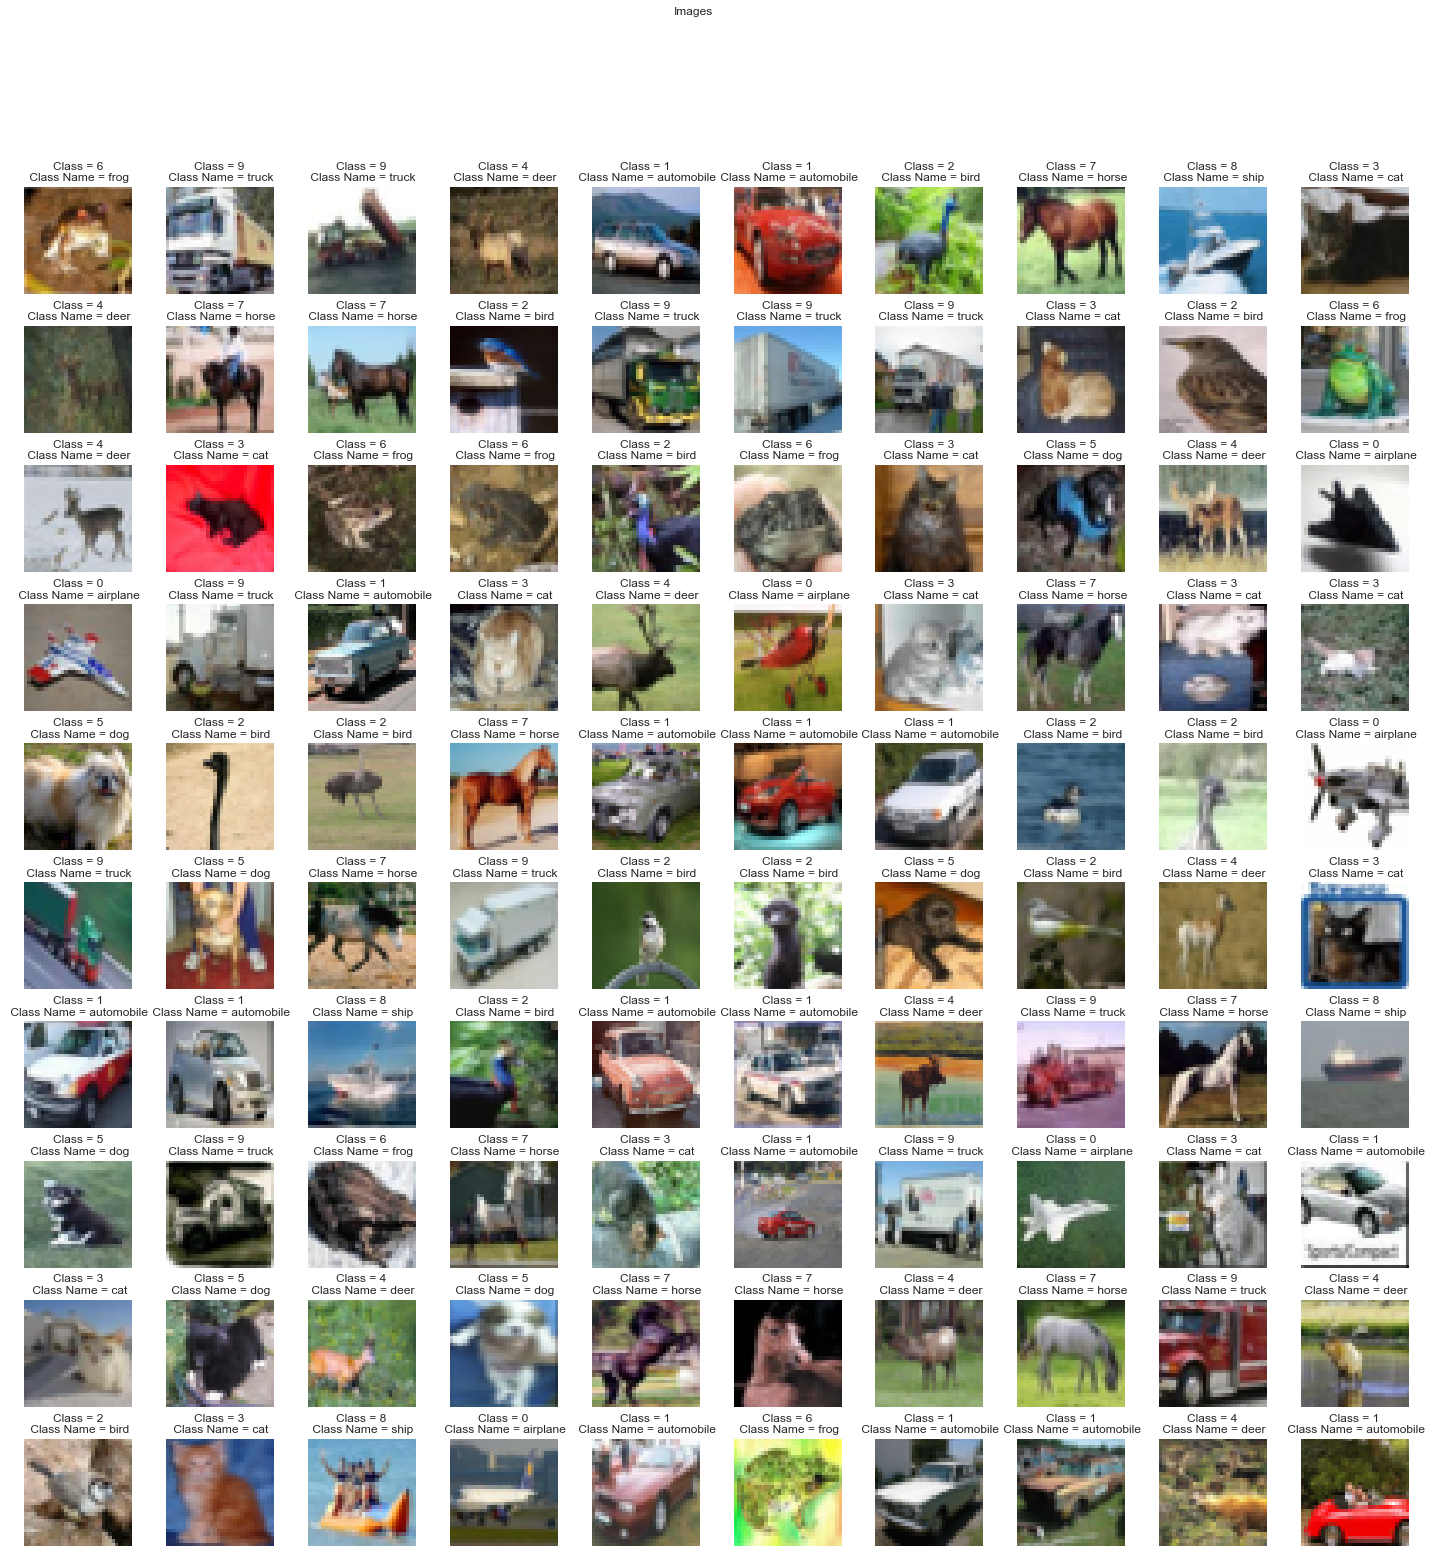

In [10]:
L=10
W=10

fig,ax = plt.subplots(L,W,figsize=(25,25))
ax = ax.ravel()
fig.suptitle('Images')
for i in range(0,L*W):
    ax[i].imshow(X_train[i])
    ax[i].set_title("Class = %d\n Class Name = %s"%(y_train[i][0],labels[y_train[i][0]]))
    ax[i].axis('off')
plt.subplots_adjust(hspace=0.3)

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import tensorflow.keras

In [14]:
y_train = tensorflow.keras.utils.to_categorical(y_train,10)
y_test = tensorflow.keras.utils.to_categorical(y_test,10)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
Input_shape = X_train.shape[1:]

In [17]:
Input_shape

(32, 32, 3)

In [18]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_absolute_error

In [19]:
# cnn_model = Sequential()
# cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
# cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.4))


# cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
# cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.4))

# cnn_model.add(Flatten())

# cnn_model.add(Dense(units = 1024, activation = 'relu'))

# cnn_model.add(Dense(units = 1024, activation = 'relu'))

# cnn_model.add(Dense(units = 10, activation = 'softmax'))

# cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tensorflow.keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape = Input_shape))
model.add(Conv2D(32,kernel_size=(3,3) ,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
          
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
          
model.add(Flatten())
          
model.add(Dense(units=512, activation='relu'))
          
model.add(Dense(units=512, activation='relu'))
          
model.add(Dense(units=10, activation='softmax'))


model.compile(optimizer = tensorflow.keras.optimizers.RMSprop(lr = 0.001),loss='categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.fit(X_train,y_train, batch_size=32, epochs=2,shuffle=True )

Epoch 1/2
1563/1563 [==============================] - 221s 141ms/step - loss: 1.5932 - accuracy: 0.4210
Epoch 2/2
1563/1563 [==============================] - 168s 108ms/step - loss: 1.2183 - accuracy: 0.5717


In [22]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 5s 15ms/step - loss: 1.0432 - accuracy: 0.6350
Test Accuracy: 0.6349999904632568


In [23]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
predictions

array([3, 1, 8, ..., 5, 1, 7])

In [25]:
actual = y_test.argmax(1)

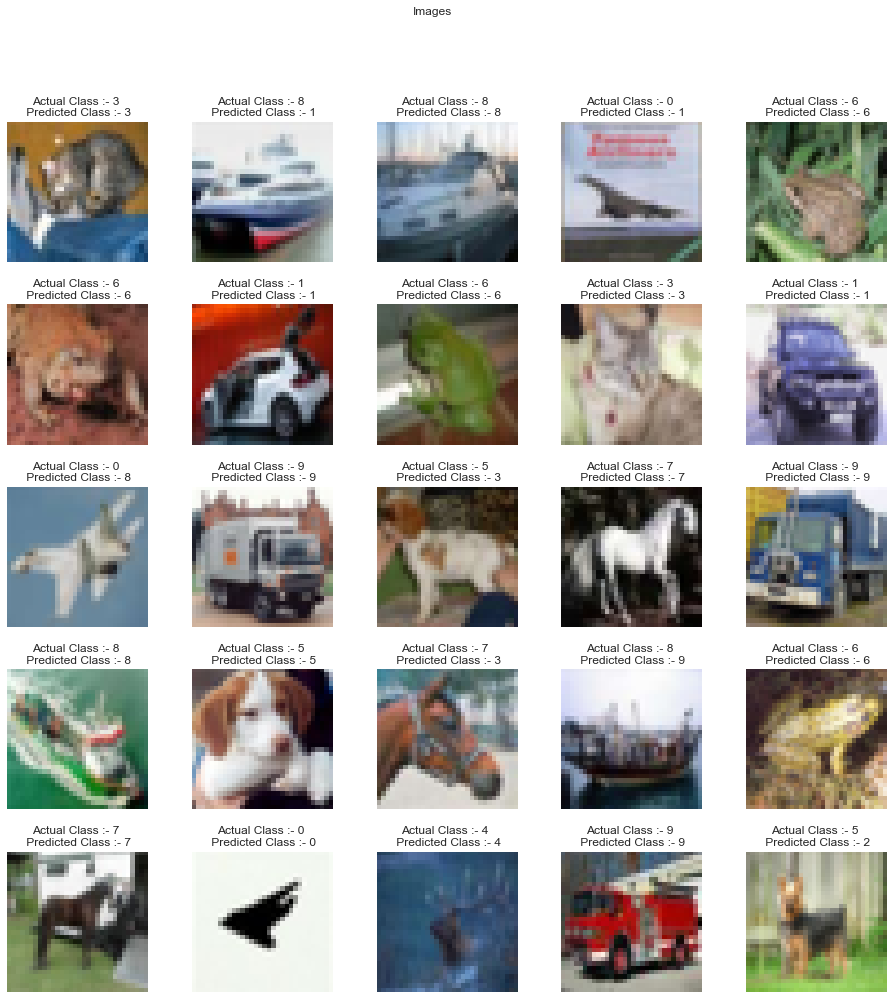

In [26]:
L = 5
W = 5
fig,ax = plt.subplots(L,W,figsize=(16,16))
ax = ax.ravel()
fig.suptitle('Images')
for i in np.arange(0,L*W):
    ax[i].imshow(X_test[i])
    ax[i].set_title("Actual Class :- %d \n Predicted Class :- %d"%(actual[i],predictions[i]))
    ax[i].axis('off')
plt.subplots_adjust(hspace=0.3)
    